**Ads Click-Through Rate Prediction**

**Introduction**

Ads Click-Through Rate (CTR) prediction involves predicting whether a user will click on an ad based on their features and behavior. This helps companies optimize ad targeting and improve engagement.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Data Import**

In [ ]:
df = pd.read_csv("Ads Click.csv")

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


**EDA - Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


**Data Visualization**

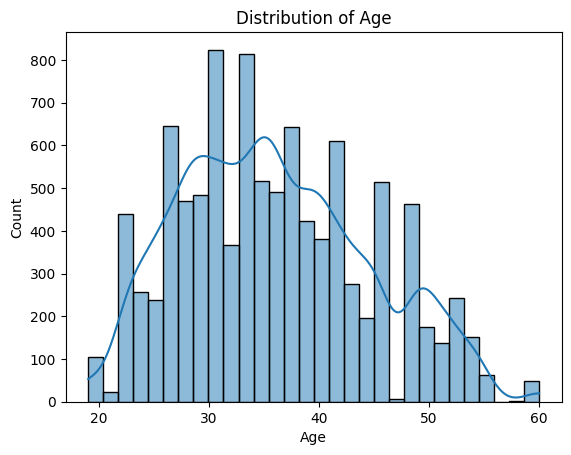

In [ ]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

In [ ]:
fig1 = px.histogram(df, x="Age", color="Clicked on Ad",
                    title="Age Distribution by Ad Clicks",
                    color_discrete_map={0:"lightblue", 1:"crimson"},
                    nbins=30, marginal="box")
fig1.show()

In [ ]:
fig2 = px.histogram(df, x="Daily Time Spent on Site", color="Clicked on Ad",
                    title="Time Spent on Site by Ad Clicks",
                    color_discrete_map={0:"lightgreen", 1:"orange"},
                    nbins=30, marginal="violin")
fig2.show()

In [ ]:
fig3 = px.scatter(df, x="Daily Time Spent on Site", y="Area Income",
                  color="Clicked on Ad", size="Daily Internet Usage",
                  hover_data=["Gender","City"],
                  title="Time Spent vs Income by Clicked on Ad",
                  color_discrete_map={0:"blue", 1:"red"})
fig3.show()


In [ ]:
fig4 = px.box(df, x="Gender", y="Daily Time Spent on Site",
              color="Clicked on Ad",
              title="Time Spent on Site by Gender and Clicked on Ad",
              color_discrete_map={0:"lightblue", 1:"crimson"})
fig4.show()


In [ ]:
total_users = len(df)
clicked = df["Clicked on Ad"].sum()
ctr = clicked / total_users * 100
print(f"Overall Ads CTR: {ctr:.2f}%")

import plotly.express as px
fig = px.pie(df, names="Clicked on Ad", title="Clicked on Ad Distribution",
             color="Clicked on Ad", color_discrete_map={0:"lightblue", 1:"crimson"})
fig.show()

Overall Ads CTR: 49.17%


**Choosing the Best Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop("Clicked on Ad", axis=1)
y = df["Clicked on Ad"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["float64", "int64"]).columns

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(probability=True, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {}

for name, clf in models.items():
    pipe = Pipeline([("preprocessor", preprocessor), ("classifier", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print("Model Scores:", results)
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Model Scores: {'RandomForest': 0.899, 'GradientBoosting': 0.839, 'LogisticRegression': 0.9025, 'SVC': 0.902}
Best Model: LogisticRegression with Accuracy: 0.9025


**Logistic Regression CTR Model Training**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

df = pd.read_csv("Ads Click.csv")

X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

pickle.dump(log_model, open("best_ctr_logistic_model.pkl", "wb"))

Accuracy: 0.71


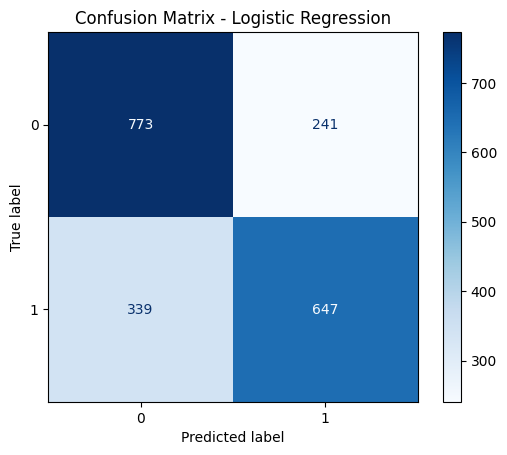

In [ ]:


y_pred = log_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", round(acc, 4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Conclusion**

The Logistic Regression model demonstrated strong performance in predicting ad click-through rates, achieving an accuracy of approximately 90%. The confusion matrix indicates that the model is effective at distinguishing between users who clicked and those who did not. This approach can help businesses optimize ad targeting, improve user engagement, and maximize return on advertising spend. Further improvements could include feature engineering, trying ensemble models, or tuning hyperparameters to increase prediction accuracy even more.